## 날씨 예측 모델

In [7]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
import lightgbm as lgb

In [8]:
seoul_temperature = pd.read_csv("../CSV/서울 기상 데이터/2013_2018_seoul_temperature.csv", parse_dates = ["일시"])

In [9]:
seoul_temperature.head(3)

,일시,기온(°C),year,month,day,hour,weekday
0,2013-01-01 00:00:00,-8.3,2013,1,1,0,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,1,1
2,2013-01-01 02:00:00,-8.4,2013,1,1,2,1


In [10]:
seoul_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       52584 non-null  datetime64[ns]
 1   기온(°C)   52584 non-null  float64       
 2   year     52584 non-null  int64         
 3   month    52584 non-null  int64         
 4   day      52584 non-null  int64         
 5   hour     52584 non-null  int64         
 6   weekday  52584 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.8 MB


In [11]:
seoul_temperature.shape

(52584, 7)

In [14]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour", "weekday"]]
y = seoul_temperature["기온(°C)"]

model_list = ["LinearRegression", 
              "DecisionTreeRegressor", 
              "RandomForestRegressor", 
              "GradientBoostingRegressor", 
              "xgboost", 
              "lightgbm"]

models = [LinearRegression(), 
         DecisionTreeRegressor(), 
         RandomForestRegressor(n_jobs = -1, random_state = 37), 
         GradientBoostingRegressor(random_state = 37), 
         xgb.XGBRegressor(), 
         lgb.LGBMRegressor()]

test_size = []
train_score = []
test_score = []
MAE = []
MSE = []
RMSE = []
model_name = []
    
for idx, model in enumerate(models) :
    for i in range(1, 10, 1) :
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                           test_size = i / 10,
                                                           random_state = 77)
        print("model :", model_list[idx])
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        # 결정계수 확인
        print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
        print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

        # 평가 지표
        print("MAE :", mean_absolute_error(y_test, pred))
        print("MSE :", mean_squared_error(y_test, pred))
        print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred)))
        print()
        test_size.append(i)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        MAE.append(mean_absolute_error(y_test, pred))
        MSE.append(mean_squared_error(y_test, pred))
        RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
        model_name.append(model_list[idx])
        
print("실행 시간 : {:.3f}".format(time.time() - start_time))

model : LinearRegression
학습용 : 9, 테스트용 : 1
학습용 데이터 결정계수: 0.069
테스트 데이터 결정계수: 0.070
MAE : 9.336284452111018
MSE : 119.62204194257278
RMSE :  10.937186198587495

model : LinearRegression
학습용 : 8, 테스트용 : 2
학습용 데이터 결정계수: 0.070
테스트 데이터 결정계수: 0.064
MAE : 9.337799248322959
MSE : 119.58197571877042
RMSE :  10.935354393835182

model : LinearRegression
학습용 : 7, 테스트용 : 3
학습용 데이터 결정계수: 0.070
테스트 데이터 결정계수: 0.066
MAE : 9.31572113308792
MSE : 118.56603018096901
RMSE :  10.88880297282346

model : LinearRegression
학습용 : 6, 테스트용 : 4
학습용 데이터 결정계수: 0.070
테스트 데이터 결정계수: 0.067
MAE : 9.312395267982692
MSE : 118.29429535285288
RMSE :  10.876318097263104

model : LinearRegression
학습용 : 5, 테스트용 : 5
학습용 데이터 결정계수: 0.071
테스트 데이터 결정계수: 0.067
MAE : 9.310065522039034
MSE : 118.32767121043831
RMSE :  10.87785232527259

model : LinearRegression
학습용 : 4, 테스트용 : 6
학습용 데이터 결정계수: 0.072
테스트 데이터 결정계수: 0.066
MAE : 9.310480762882973
MSE : 118.44065773596984
RMSE :  10.883044506753146

model : LinearRegression
학습용 : 3, 테스트용 : 7


학습용 : 3, 테스트용 : 7
학습용 데이터 결정계수: 0.950
테스트 데이터 결정계수: 0.945
MAE : 2.0704933288764718
MSE : 7.026324483929396
RMSE :  2.6507215025214164

model : lightgbm
학습용 : 2, 테스트용 : 8
학습용 데이터 결정계수: 0.951
테스트 데이터 결정계수: 0.943
MAE : 2.0907176705998043
MSE : 7.207702462051211
RMSE :  2.6847164584088223

model : lightgbm
학습용 : 1, 테스트용 : 9
학습용 데이터 결정계수: 0.952
테스트 데이터 결정계수: 0.933
MAE : 2.2576059643615616
MSE : 8.529848055847353
RMSE :  2.92059036084271

실행 시간 : 33.262


In [15]:
print("test_size length : ", len(test_size))
print("train_score length :", len(train_score))
print("test_score length :", len(test_score))
print("MAE length :", len(MAE))
print("MSE length :", len(MSE))
print("RMSE length :", len(RMSE))
print("model_name length :", len(model_name))

test_size length :  54
train_score length : 54
test_score length : 54
MAE length : 54
MSE length : 54
RMSE length : 54
model_name length : 54


In [16]:
data_dict = {"model" : model_name, "test_size" : test_size, "train_score" : train_score, 
            "test_score" : test_score, "MAE" : MAE, "MSE" : MSE, "RMSE" : RMSE}
df = pd.DataFrame(data_dict)

In [17]:
df["train_score"] = df["train_score"] * 100
df["test_score"] = df["test_score"] * 100
df

,model,test_size,train_score,test_score,MAE,MSE,RMSE
0,LinearRegression,1,6.880988,6.979415,9.336284,119.622042,10.937186
1,LinearRegression,2,7.008811,6.418330,9.337799,119.581976,10.935354
2,LinearRegression,3,6.999544,6.622788,9.315721,118.566030,10.888803
3,LinearRegression,4,7.005181,6.711766,9.312395,118.294295,10.876318
4,LinearRegression,5,7.083026,6.676219,9.310066,118.327671,10.877852
5,LinearRegression,6,7.212210,6.644292,9.310481,118.440658,10.883045
6,LinearRegression,7,7.378988,6.651421,9.307261,118.364042,10.879524
7,LinearRegression,8,7.284637,6.759848,9.310837,118.311356,10.877102
8,LinearRegression,9,7.467441,6.735575,9.301279,118.520524,10.886713
9,DecisionTreeRegressor,1,100.000000,98.748721,0.779274,1.609112,1.268508


In [18]:
df.describe()

,test_size,train_score,test_score,MAE,MSE,RMSE
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,5.000000,81.832101,80.526916,2.995640,24.763415,3.751291
std,2.606233,33.847576,33.431870,2.912608,42.518661,3.300448
min,1.000000,6.880988,6.418330,0.603707,0.752604,0.867528
25%,3.000000,91.278291,91.090473,1.428581,3.606198,1.898953
50%,5.000000,96.368688,94.706170,2.021424,6.717336,2.591779
75%,7.000000,99.783194,97.173285,2.611838,11.303956,3.362135
max,9.000000,100.000000,99.414759,9.337799,119.622042,10.937186


### 최종 모델 선정

In [19]:
# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour", "weekday"]]
y = seoul_temperature["기온(°C)"]

i = 1

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                           test_size = i / 10,
                                                           random_state = 77)
model = RandomForestRegressor(n_jobs = -1, random_state = 37)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 결정계수 확인
print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# 평가 지표
print("MAE :", mean_absolute_error(y_test, pred))
print("MSE :", mean_squared_error(y_test, pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred)))

학습용 : 9, 테스트용 : 1
학습용 데이터 결정계수: 0.999
테스트 데이터 결정계수: 0.994
MAE : 0.6037073588134622
MSE : 0.7526042329340176
RMSE :  0.8675276554289307


In [8]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour"]]
y = seoul_temperature["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()
    
print("실행 시간 : {}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.992

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.990

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.989

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.986

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.983

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.978

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.996
테스트용 데이터 정확도 : 0.970

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.994
테스트용 데이터 정확도 : 0.958

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.991
테스트용 데이터 정확도 : 0.936

실행 시간 : 38.3636429309845


In [9]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "hour"]]
y = seoul_temperature["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()
    
print("실행 시간 : {}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.886

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.885

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.893
테스트용 데이터 정확도 : 0.883

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.882

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.882

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.896
테스트용 데이터 정확도 : 0.879

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.899
테스트용 데이터 정확도 : 0.875

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.905
테스트용 데이터 정확도 : 0.868

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.923
테스트용 데이터 정확도 : 0.853

실행 시간 : 17.035470247268677


### 최종 모델 선택

In [10]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour", "weekday"]]
y = seoul_temperature["기온(°C)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.1,
                                                   random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

print("학습용 : {}, 테스트용 : {}".format(10 - 1, 1))
print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
print("실행 시간 : {:.3f}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.994
실행 시간 : 7.289


In [20]:
test = pd.read_csv("../CSV/new_test.csv")

In [21]:
test.head(3)

,일자|시간|구분,일자,시간,구분,구분_int,일시,year,month,day,hour,weekday
0,2019-01-01 01 A,2019-01-01,1,A,0,2019-01-01 00:00:00,2019,1,1,0,1
1,2019-01-01 02 A,2019-01-01,2,A,0,2019-01-01 01:00:00,2019,1,1,1,1
2,2019-01-01 03 A,2019-01-01,3,A,0,2019-01-01 02:00:00,2019,1,1,2,1


In [22]:
test.shape

(15120, 11)

In [23]:
test.tail(3)

,일자|시간|구분,일자,시간,구분,구분_int,일시,year,month,day,hour,weekday
15117,2019-03-31 22 H,2019-03-31,22,H,6,2019-03-31 21:00:00,2019,3,31,21,6
15118,2019-03-31 23 H,2019-03-31,23,H,6,2019-03-31 22:00:00,2019,3,31,22,6
15119,2019-03-31 24 H,2019-03-31,24,H,6,2019-03-31 23:00:00,2019,3,31,23,6


In [24]:
test_x = test[["year", "month", "day", "hour", "weekday"]]

### 19년도 기온 예측

In [25]:
pred = model.predict(test_x)
test["기온(°C)"] = np.round(pred, 1) # 예측한 기온을 소수 첫째자리까지 표시

In [26]:
test.head(50)

,일자|시간|구분,일자,시간,구분,구분_int,일시,year,month,day,hour,weekday,기온(°C)
0,2019-01-01 01 A,2019-01-01,1,A,0,2019-01-01 00:00:00,2019,1,1,0,1,-2.5
1,2019-01-01 02 A,2019-01-01,2,A,0,2019-01-01 01:00:00,2019,1,1,1,1,-2.6
2,2019-01-01 03 A,2019-01-01,3,A,0,2019-01-01 02:00:00,2019,1,1,2,1,-2.9
3,2019-01-01 04 A,2019-01-01,4,A,0,2019-01-01 03:00:00,2019,1,1,3,1,-3.2
4,2019-01-01 05 A,2019-01-01,5,A,0,2019-01-01 04:00:00,2019,1,1,4,1,-3.3
5,2019-01-01 06 A,2019-01-01,6,A,0,2019-01-01 05:00:00,2019,1,1,5,1,-3.6
6,2019-01-01 07 A,2019-01-01,7,A,0,2019-01-01 06:00:00,2019,1,1,6,1,-3.7
7,2019-01-01 08 A,2019-01-01,8,A,0,2019-01-01 07:00:00,2019,1,1,7,1,-3.9
8,2019-01-01 09 A,2019-01-01,9,A,0,2019-01-01 08:00:00,2019,1,1,8,1,-4.0
9,2019-01-01 10 A,2019-01-01,10,A,0,2019-01-01 09:00:00,2019,1,1,9,1,-3.5


In [27]:
seoul_temperature.head(50)

,일시,기온(°C),year,month,day,hour,weekday
0,2013-01-01 00:00:00,-8.3,2013,1,1,0,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,1,1
2,2013-01-01 02:00:00,-8.4,2013,1,1,2,1
3,2013-01-01 03:00:00,-8.1,2013,1,1,3,1
4,2013-01-01 04:00:00,-8.2,2013,1,1,4,1
5,2013-01-01 05:00:00,-8.2,2013,1,1,5,1
6,2013-01-01 06:00:00,-8.6,2013,1,1,6,1
7,2013-01-01 07:00:00,-8.3,2013,1,1,7,1
8,2013-01-01 08:00:00,-7.9,2013,1,1,8,1
9,2013-01-01 09:00:00,-7.0,2013,1,1,9,1


### 예측한 데이터 저장
* test 데이터 프레임 저장

In [28]:
test.to_csv("../CSV/pred_test.csv", index = False)

### 시각화

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='일자', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

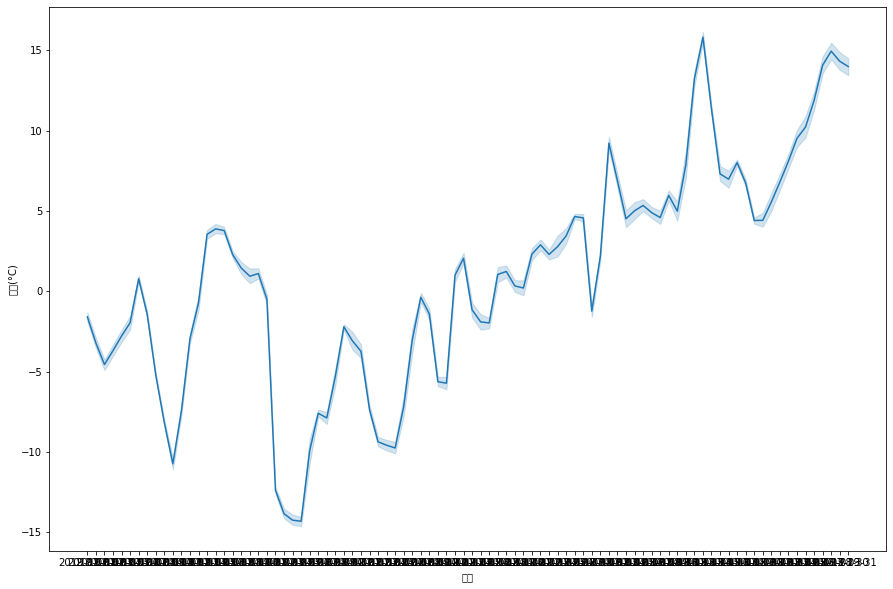

In [21]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일자", y = "기온(°C)", data = test)

In [22]:
a = seoul_temperature[(seoul_temperature["year"] == 2013) & 
             ((seoul_temperature["month"] == 1) | (seoul_temperature["month"] == 2) | (seoul_temperature["month"] == 3))]

<AxesSubplot:xlabel='일시', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

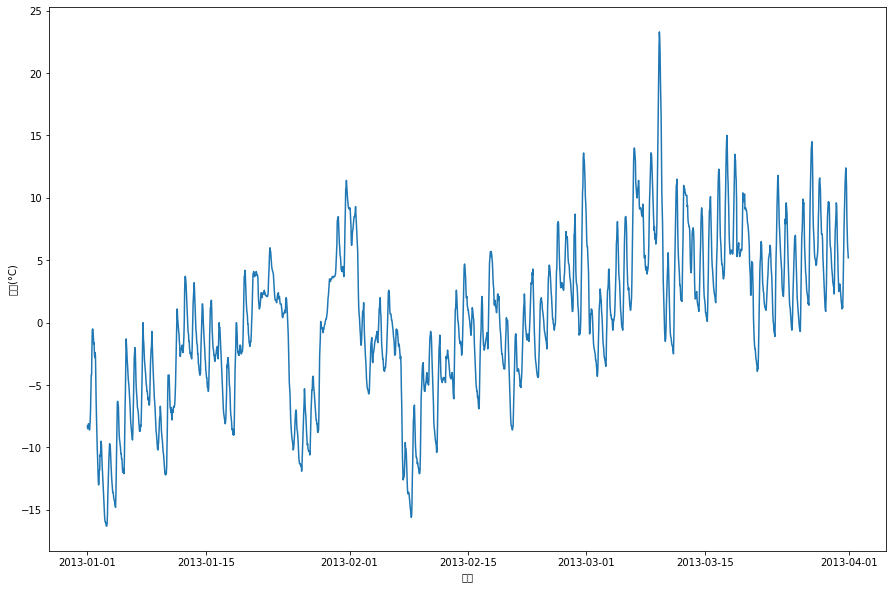

In [23]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일시", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


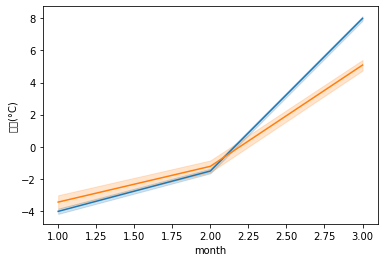

In [24]:
sns.lineplot(x = "month", y = "기온(°C)", data = test)
sns.lineplot(x = "month", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


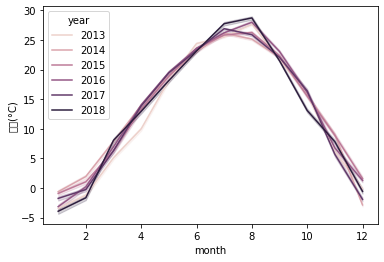

In [25]:
sns.lineplot(x = "month", y = "기온(°C)", hue = "year", data = seoul_temperature)